https://www.kaggle.com/datasets/whenamancodes/amazon-reviews-on-women-dresses

Amazon Reviews on Women Dresses

## Mengunduh Data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ronimerdiansah","key":"348f3c0ae2b3fdaae4760582c857b6e3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d thedevastator/skincare-products-that-perform-the-best-at-sepho

  0% 0.00/250k [00:00<?, ?B/s]
100% 250k/250k [00:00<00:00, 71.1MB/s]


In [5]:
!mkdir skincare-products-that-perform-the-best-at-sephosses
!unzip skincare-products-that-perform-the-best-at-sepho.zip -d skincare-products-that-perform-the-best-at-sepho
!ls skincare-products-that-perform-the-best-at-sepho

Archive:  skincare-products-that-perform-the-best-at-sepho.zip
  inflating: skincare-products-that-perform-the-best-at-sepho/brands_w_m_products.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/eyecare.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/eyecare_url.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/moisturizers.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/most_expensive.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/most_popular_by_loves.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/most_popular_by_n_reviews.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/most_popular_by_score.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/pretty_numbers.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/pretty_regression.csv  
  inflating: skincare-products-that-perform-the-best-at-sepho/product_urls.csv  
  inf

## Mepersiapkan Data

In [6]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from functools import reduce
pd.set_option('display.max_columns', None)

In [7]:
dataset = pd.read_csv('/content/skincare-products-that-perform-the-best-at-sepho/eyecare.csv')

In [8]:
dataset

,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category
0,0,OLEHENRIKSEN,Banana Bright Eye Crème,38.00,2000,126365,4.1532,0.5 oz,0,Eye Creams & Treatments
1,1,Drunk Elephant,C-Tango Vitamin C Eye Cream,64.00,469,59473,3.7527,0.5 oz,1,Eye Creams & Treatments
2,2,Shiseido,Benefiance WrinkleResist24 Intensive Eye Conto...,60.00,1000,62205,4.2610,0.51 oz,0,Eye Creams & Treatments
3,3,La Mer,The Eye Concentrate,215.00,109,16056,3.6330,0.5 oz,0,Eye Creams & Treatments
4,4,Estée Lauder,Advanced Night Repair Eye Supercharged Complex,62.00,210,14169,4.1952,0.5 oz,0,Eye Creams & Treatments
...,...,...,...,...,...,...,...,...,...,...
216,217,Klorane,BB Eye Cream with Soothing Cornflower,26.00,21,1625,3.2381,0.5 oz,0,Eye Creams & Treatments
217,218,The Inkey List,Caffeine Eye Cream,9.99,0,287,0.0000,0.5 oz,0,Eye Creams & Treatments
218,219,Guerlain,Abeille Royale Gold Eyetech Eye Sculpt Serum,130.00,13,2659,4.0769,0.5 oz,0,Eye Creams & Treatments
219,220,KENZOKI,Lotus Caress to Moisturize Eyes,35.00,8,606,3.5000,0.5 oz,0,Eye Creams & Treatments


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     221 non-null    int64  
 1   brand          221 non-null    object 
 2   name           221 non-null    object 
 3   price          221 non-null    float64
 4   n_of_reviews   221 non-null    int64  
 5   n_of_loves     221 non-null    int64  
 6   review_score   221 non-null    float64
 7   size           221 non-null    object 
 8   clean_product  221 non-null    int64  
 9   category       221 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 17.4+ KB


## Membersihkan Data

### Memilih FItur

In [10]:
dataset.rename(columns = {'Unnamed: 0':'user_id'}, inplace = True)
selected_df = dataset[['user_id', 'brand', 'name', 'review_score']]

clean_df = selected_df.dropna()

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       221 non-null    int64  
 1   brand         221 non-null    object 
 2   name          221 non-null    object 
 3   review_score  221 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [12]:
clean_df.head()

,user_id,brand,name,review_score
0,0,OLEHENRIKSEN,Banana Bright Eye Crème,4.1532
1,1,Drunk Elephant,C-Tango Vitamin C Eye Cream,3.7527
2,2,Shiseido,Benefiance WrinkleResist24 Intensive Eye Conto...,4.2610
3,3,La Mer,The Eye Concentrate,3.6330
4,4,Estée Lauder,Advanced Night Repair Eye Supercharged Complex,4.1952


### Format Ulang Fitur

In [13]:
len(clean_df.user_id.unique())

221

In [14]:
clean_df['review_score'] = round(clean_df['review_score'])
clean_df

,user_id,brand,name,review_score
0,0,OLEHENRIKSEN,Banana Bright Eye Crème,4.0
1,1,Drunk Elephant,C-Tango Vitamin C Eye Cream,4.0
2,2,Shiseido,Benefiance WrinkleResist24 Intensive Eye Conto...,4.0
3,3,La Mer,The Eye Concentrate,4.0
4,4,Estée Lauder,Advanced Night Repair Eye Supercharged Complex,4.0
...,...,...,...,...
216,217,Klorane,BB Eye Cream with Soothing Cornflower,3.0
217,218,The Inkey List,Caffeine Eye Cream,0.0
218,219,Guerlain,Abeille Royale Gold Eyetech Eye Sculpt Serum,4.0
219,220,KENZOKI,Lotus Caress to Moisturize Eyes,4.0


In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       221 non-null    int64  
 1   brand         221 non-null    object 
 2   name          221 non-null    object 
 3   review_score  221 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


### Membuat Fitur ID Produk

In [16]:
LE = LabelEncoder()

clean_df['product_id'] = LE.fit_transform(clean_df['name'])

In [17]:
clean_df

,user_id,brand,name,review_score,product_id
0,0,OLEHENRIKSEN,Banana Bright Eye Crème,4.0,25
1,1,Drunk Elephant,C-Tango Vitamin C Eye Cream,4.0,40
2,2,Shiseido,Benefiance WrinkleResist24 Intensive Eye Conto...,4.0,29
3,3,La Mer,The Eye Concentrate,4.0,187
4,4,Estée Lauder,Advanced Night Repair Eye Supercharged Complex,4.0,13
...,...,...,...,...,...
216,217,Klorane,BB Eye Cream with Soothing Cornflower,3.0,21
217,218,The Inkey List,Caffeine Eye Cream,0.0,41
218,219,Guerlain,Abeille Royale Gold Eyetech Eye Sculpt Serum,4.0,6
219,220,KENZOKI,Lotus Caress to Moisturize Eyes,4.0,118


In [18]:
for col in clean_df:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(clean_df[col].value_counts(), '\n')

user_id 
--------------------
0      1
153    1
142    1
143    1
144    1
      ..
77     1
78     1
79     1
80     1
221    1
Name: user_id, Length: 221, dtype: int64 

brand 
--------------------
Perricone MD         10
Shiseido             10
philosophy            9
CLINIQUE              9
Peter Thomas Roth     9
                     ..
Dr Roebuck's          1
Erno Laszlo           1
Charlotte Tilbury     1
Supergoop!            1
The Inkey List        1
Name: brand, Length: 78, dtype: int64 

name 
--------------------
Eye Mask                                     2
Banana Bright Eye Crème                      1
Gold Rush Eye Balm                           1
Retinol Fusion PM Eye Cream                  1
No Makeup Concealer Broad Spectrum SPF 20    1
                                            ..
Cooling Water Eye Patches                    1
Hydrating Eye Cream                          1
White Lucent Anti-Dark Circles Eye Cream     1
Hyaluronic Eye Cream                         1

## Model Development dengan Content Based Filtering

In [19]:
product_id = clean_df['product_id'].tolist()
 
brand = clean_df['brand'].tolist()
 
name = clean_df['name'].tolist()
 
print(len(product_id))
print(len(brand))
print(len(name))

221
221
221


In [20]:
product_new = pd.DataFrame({
    'product_id': product_id,
    'name': name,
    'brand': brand
})
product_new

,product_id,name,brand
0,25,Banana Bright Eye Crème,OLEHENRIKSEN
1,40,C-Tango Vitamin C Eye Cream,Drunk Elephant
2,29,Benefiance WrinkleResist24 Intensive Eye Conto...,Shiseido
3,187,The Eye Concentrate,La Mer
4,13,Advanced Night Repair Eye Supercharged Complex,Estée Lauder
...,...,...,...
216,21,BB Eye Cream with Soothing Cornflower,Klorane
217,41,Caffeine Eye Cream,The Inkey List
218,6,Abeille Royale Gold Eyetech Eye Sculpt Serum,Guerlain
219,118,Lotus Caress to Moisturize Eyes,KENZOKI


In [21]:
first_df = product_new
first_df.sample(5)

,product_id,name,brand
132,157,Redness Recovery+ Antioxidant Eye Treatment,Skinfix
148,96,High Performance Continuous Moisture Eye Cream,Anthony
93,63,EYEBOOST™ Reviving Eye Mask,GLAMGLOW
180,107,Illuminating Eye Crème,Tata Harper
15,86,Ferulic + Retinol Triple Correction Eye Serum,Dr. Dennis Gross Skincare


### TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(first_df['brand']) 
tf.get_feature_names() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1851',
 'aid',
 'algenist',
 'alpha',
 'amorepacific',
 'anthony',
 'badescu',
 'bar',
 'bareminerals',
 'beauty',
 'beautybio',
 'belif',
 'bioeffect',
 'biossance',
 'bobbi',
 'boscia',
 'brandt',
 'brown',
 'caudalie',
 'charlotte',
 'clarins',
 'clarisonic',
 'clean',
 'clinical',
 'clinique',
 'collection',
 'cosmetics',
 'dennis',
 'dermadoctor',
 'dermalogica',
 'dior',
 'dr',
 'drunk',
 'edible',
 'elephant',
 'erno',
 'estée',
 'eve',
 'farmacy',
 'first',
 'foreo',
 'fresh',
 'glamglow',
 'gross',
 'guerlain',
 'harper',
 'ii',
 'inc',
 'indie',
 'inkey',
 'it',
 'jart',
 'kate',
 'kenzoki',
 'kiehl',
 'klorane',
 'kopari',
 'kora',
 'korres',
 'la',
 'lancer',
 'lancôme',
 'laneige',
 'laszlo',
 'lauder',
 'laundry',
 'laurent',
 'lee',
 'list',
 'lom',
 'makeup',
 'mario',
 'md',
 'mer',
 'milk',
 'murad',
 'nars',
 'naturally',
 'obagi',
 'occitane',
 'olehenriksen',
 'omorovicza',
 'organics',
 'origins',
 'out',
 'peace',
 'people',
 'perricone',
 'peter',
 'philosophy

In [23]:
tfidf_matrix = tf.fit_transform(first_df['brand']) 
 
tfidf_matrix.shape 

(221, 118)

In [24]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=first_df.name
).sample(22, axis=1).sample(10, axis=0)

,mer,cosmetics,collection,laneige,beauty,ren,gross,kate,laszlo,yves,skincare,murad,tarte,people,dennis,out,roth,lee,klorane,perricone,amorepacific,laundry
name,,,,,,,,,,,,,,,,,,,,,,
The Eye Balm Intense,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barrier+ Lipid-Boost 360° Eye,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRILLIANT FUTURE™ Age Defense & Renew Eye Cream,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rose Hydrating Eye Gel Cream,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forever Light Creator Eye Fluid,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DayWear Eye Cooling Anti-Oxidant Moisture GelCreme,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baggage Claim Gold Eye Masks,0.000000,0.0,0.0,0.0,0.602571,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Renewed Hope In A Jar Eye,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Advanced Génifique Eye Cream,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=first_df['name'], columns=first_df['name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (221, 221)


name,Orchidée Impériale Eye Serum,Advanced Night Repair Eye Concentrate Matrix,Keep Young and Beautiful Anti-Ageing Eye Cream,Pack Your Bags Undereye Patches,Plantscription™ Anti-Aging Power Eye Cream
name,,,,,
Multi-Active Eye,0.0,0.0,0.000000,0.0,0.0
Abeille Royale Gold Eyetech Eye Sculpt Serum,1.0,0.0,0.000000,0.0,0.0
Potent-C™ Vitamin C Power Eye Cream,0.0,0.0,0.000000,0.0,0.0
Ferulic + Retinol Triple Correction Eye Serum,0.0,0.0,0.214309,0.0,0.0
Capture Youth Age-Delay Advanced Eye Treatment,0.0,0.0,0.000000,0.0,0.0
Essential-C Eye Cream SPF 15 PA++,0.0,0.0,0.000000,0.0,0.0
Bright Eyes Collagen-Infused Brightening Colloidal Silver Eye Masks,0.0,0.0,0.000000,0.0,0.0
Down Under Collagen Boosting Eye Treatment,0.0,0.0,0.000000,0.0,0.0
Énergie de Vie The Illuminating & Anti-Fatigue Cooling Eye Gel,0.0,0.0,0.000000,0.0,0.0


### Mendapatkan Rekomendasi

In [28]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=first_df[['name', 'brand']], k=5):
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [29]:
first_df[first_df.name.eq('I-Waken Eye Serum')]

,product_id,name,brand
152,105,I-Waken Eye Serum,Indie Lee


In [30]:
resto_recommendations('I-Waken Eye Serum')

,name,brand
0,Crème Ancienne® Eye Cream,Fresh
1,Potent-C™ Vitamin C Power Eye Cream,Peter Thomas Roth
2,Hyaluronic Eye Cream,Mario Badescu
3,All About Eyes Serum De-Puffing Eye Massage,CLINIQUE
4,Rénergie Lift Multi-Action Eye,Lancôme


## Model Development dengan Collaborative Filtering

In [31]:
user_id = clean_df['user_id'].tolist()
 
product_id = clean_df['product_id'].tolist()

rating = clean_df['review_score'].tolist()
 
print(len(user_id))
print(len(product_id))
print(len(rating))

221
221
221


In [32]:
rating_new = pd.DataFrame({
    'user_id': user_id,
    'product_id' : product_id,
    'rating': rating
})
rating_new

,user_id,product_id,rating
0,0,25,4.0
1,1,40,4.0
2,2,29,4.0
3,3,187,4.0
4,4,13,4.0
...,...,...,...
216,217,21,3.0
217,218,41,0.0
218,219,6,4.0
219,220,118,4.0


In [33]:
second_df = rating_new
second_df.sample(5)

,user_id,product_id,rating
176,177,156,4.0
102,102,115,4.0
60,60,32,4.0
189,190,131,4.0
111,112,171,4.0


### Mempersiapkan Data

In [34]:
user_ids = second_df['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [35]:
eyecare_ids = second_df['product_id'].unique().tolist()
 
eyecare_to_eyecare_encoded = {x: i for i, x in enumerate(eyecare_ids)}
 
eyecare_encoded_to_eyecare = {i: x for i, x in enumerate(eyecare_ids)}

In [36]:
second_df['user'] = second_df['user_id'].map(user_to_user_encoded)

second_df['product'] = second_df['product_id'].map(eyecare_to_eyecare_encoded)

In [37]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_eyecare = len(eyecare_to_eyecare_encoded)
print(num_eyecare)
 
min_rating = min(second_df['rating'])
 
max_rating = max(second_df['rating'])
 
print('Number of User: {}, Number of Skincare: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_eyecare, min_rating, max_rating
))

221
220
Number of User: 221, Number of Skincare: 220, Min Rating: 0.0, Max Rating: 5.0


### Membagi Data untuk Training dan Validasi

In [38]:
second_df = second_df.sample(frac=1, random_state=42)
second_df

,user_id,product_id,rating,user,product
132,133,157,4.0,132,132
148,149,96,4.0,148,148
93,93,63,4.0,93,93
180,181,107,3.0,180,180
15,15,86,4.0,15,15
...,...,...,...,...,...
106,106,75,4.0,106,106
14,14,39,4.0,14,14
92,92,178,4.0,92,92
179,180,14,4.0,179,179


In [39]:
x = second_df[['user','product']].values
 
y = second_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * second_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[132 132]
 [148 148]
 [ 93  93]
 [180 180]
 [ 15  15]
 [115 115]
 [172 172]
 [209 209]
 [ 75  75]
 [142 142]
 [100 100]
 [ 30  30]
 [190 190]
 [  9   9]
 [ 67  67]
 [219 218]
 [175 175]
 [ 18  18]
 [197 197]
 [ 66  66]
 [189 189]
 [ 96  96]
 [211 211]
 [ 25  25]
 [127 127]
 [201 201]
 [ 97  97]
 [ 16  16]
 [ 45  45]
 [154 154]
 [111 111]
 [ 55  55]
 [108 108]
 [196 196]
 [ 73  73]
 [109 109]
 [ 82  82]
 [138 138]
 [141 141]
 [101 101]
 [ 86  86]
 [193 193]
 [120 120]
 [ 95  95]
 [ 79  79]
 [218 217]
 [113 113]
 [140 140]
 [122 122]
 [162 162]
 [216 215]
 [ 38  38]
 [ 24  24]
 [185 185]
 [137 137]
 [ 29  29]
 [ 19  19]
 [ 69  69]
 [205 205]
 [ 60  60]
 [ 68  68]
 [  5   5]
 [139 139]
 [ 56  56]
 [156 156]
 [176 176]
 [163 163]
 [ 65  65]
 [112 112]
 [186 186]
 [155 155]
 [ 31  31]
 [ 12  12]
 [ 35  35]
 [ 28  28]
 [ 42  42]
 [ 84  84]
 [104 104]
 [150 150]
 [ 51  51]
 [124 124]
 [177 177]
 [ 76  76]
 [ 41  41]
 [135 135]
 [ 78  78]
 [178 178]
 [ 26  26]
 [146 146]
 [173 173]
 [206 206]

### Proses Training

In [40]:
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [41]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_eyecare, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_eyecare = num_eyecare
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.eyecare_embedding = layers.Embedding(
        num_eyecare,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.eyecare_bias = layers.Embedding(num_eyecare, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0]) 
    eyecare_vector = self.eyecare_embedding(inputs[:, 1])
    eyecare_bias = self.eyecare_bias(inputs[:, 1])
 
    dot_user_eyecare = tf.tensordot(user_vector, eyecare_vector, 2) 
 
    x = dot_user_eyecare + user_bias + eyecare_bias
    
    return tf.nn.sigmoid(x)

In [42]:
model = RecommenderNet(num_users, num_eyecare, 50)
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [43]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 0.6988 - root_mean_squared_error: 0.2953 - val_loss: 0.6916 - val_root_mean_squared_error: 0.2956
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6325 - root_mean_squared_error: 0.2332 - val_loss: 0.6911 - val_root_mean_squared_error: 0.2951
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5912 - root_mean_squared_error: 0.1859 - val_loss: 0.6905 - val_root_mean_squared_error: 0.2946
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5664 - root_mean_squared_error: 0.1519 - val_loss: 0.6900 - val_root_mean_squared_error: 0.2942
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5544 - root_mean_squared_error: 0.1340 - val_loss: 0.6895 - val_root_mean_squared_error: 0.2938
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5468 - root_mean_squared_error: 0.1212 - val_loss: 0.6891 - val_root_

### Visualisasi Metrik

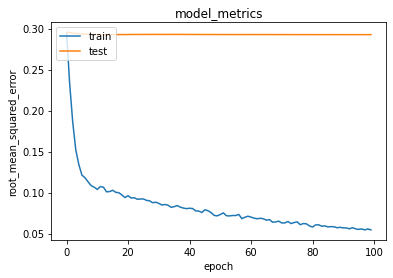

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi Eyecare

In [45]:
eyecare_df = product_new
rating_df = rating_new
 
user_id = rating_df['user_id'].sample(1).iloc[0]
eyecare_visited_by_user = rating_df[rating_df['product_id'] == user_id]
 
eyecare_not_visited = eyecare_df[~eyecare_df['product_id'].isin(eyecare_visited_by_user['product_id'].values)]['product_id'] 
eyecare_not_visited = list(
    set(eyecare_not_visited)
    .intersection(set(eyecare_to_eyecare_encoded.keys()))
)
 
eyecare_not_visited = [[eyecare_to_eyecare_encoded.get(x)] for x in eyecare_not_visited]
user_encoder = eyecare_to_eyecare_encoded.get(user_id)
user_eyecare_array = np.hstack(
    ([[user_encoder]] * len(eyecare_not_visited), eyecare_not_visited)
)

In [46]:
ratings = model.predict(user_eyecare_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_eyecare_ids = [
    eyecare_encoded_to_eyecare.get(eyecare_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('======' * 9)
print('Eyecare with high ratings from user')
print('--------' * 8)
 
top_eyecare_user = (
    eyecare_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .product_id.values
)
 
eyecare_df_rows = eyecare_df[eyecare_df['product_id'].isin(top_eyecare_user)]
for row in eyecare_df_rows.itertuples():
    print(row.name, ':', row.brand)
 
print('--------' * 8)
print('Top 10 resto recommendation')
print('--------' * 8)
 
recommended_eyecare = eyecare_df[eyecare_df['product_id'].isin(recommended_eyecare_ids)]
for row in recommended_eyecare.itertuples():
    print(row.name, ':', row.brand)

7/7 [==============================] - 0s 2ms/step
Showing recommendations for users: 199
Eyecare with high ratings from user
----------------------------------------------------------------
Vine[activ] Energizing Vitamin C Eye Cream : Caudalie
----------------------------------------------------------------
Top 10 resto recommendation
----------------------------------------------------------------
Moisturizing Eye Bomb : belif
Barrier+ Lipid-Boost 360° Eye : Skinfix
FAB Skin Lab Retinol Eye Cream with Triple Hyaluronic Acid : First Aid Beauty
EGF Eye Serum : BIOEFFECT
Advanced Génifique Eye Cream : Lancôme
anti-wrinkle miracle worker eye+ line-correcting eye cream : philosophy
Stress Positive Eye Lift Mask  : Dermalogica
TIME RESPONSE Eye Reserve Crème : AMOREPACIFIC
A Glowing Regimen Trial Set : philosophy
Essential Fx Acyl-Glutathione Smoothing & Brightening Under-Eye Cream : Perricone MD
